# Comparison of Multiple Coulomb Scattering Models

In [3]:
# Force reload (if changes have been made to the module)
%load_ext autoreload
%autoreload 2

# Initialization of the tutorial
from platform import python_version
print("Python version: ", python_version())

import numpy
print("Numpy version: ", numpy.__version__)

import os
current_path = os.getcwd()
PETITE_home_dir= current_path.split('examples')[0]

print("PETITE home directory:", PETITE_home_dir)
# folder where VEGAS dictionaries are stored
#dictionary_dir = "data/VEGAS_dictionaries/"
dictionary_dir = "data/"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Python version:  3.11.3
Numpy version:  1.24.2
PETITE home directory: /home/nblinov/HEP/PETITE/


### Load in dependencies and set font styles

In [4]:
from PETITE.shower import *
from PETITE.dark_shower import *

import pickle as pk
from matplotlib import pyplot as plt
# from tqdm import tqdm
from tqdm.notebook import tqdm

import matplotlib

from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator, MaxNLocator
import cProfile
profile = cProfile.Profile()
import pstats

font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')
legfont=font0.copy()
legfont.set_size(18)
legfont.set_weight('bold')


def set_size(w,h, ax=None):
    """ Helper function to set figure size.
        Input:
            w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)



# Fast MCS Mode

Just make sure it runs in "fast" mode 

In [5]:
E0 = 10. # energy of incident particle in GeV
# Define incident electron
px, py, pz = 0, 0, np.sqrt(E0**2 - 0.000511**2)
# dictionary with particle properties
# The crucial keys are 'PID' and 'ID', others are for efficient bookkeeping
particle_dict = {'PID':11, 'ID':0, 'generation_number':0, 'generation_process':'Input'}
p0 = Particle([E0, px, py, pz], [0,0,0], particle_dict)


print(PETITE_home_dir+dictionary_dir)
sGraphite = Shower(PETITE_home_dir+dictionary_dir, "graphite", 0.030)
sLead = Shower(PETITE_home_dir+dictionary_dir, "lead", 0.030)
# Generate standard shower for graphite and lead, let's do some verbosity to see what's going on
standard_shower_graphite = sGraphite.generate_shower(p0, VB=True)
standard_shower_lead = sLead.generate_shower(p0, VB=True)

/home/nblinov/HEP/PETITE/data/
Starting shower, initial particle with ID Info
{'PID': 11, 'ID': 0, 'parent_PID': 22, 'parent_ID': -1, 'generation_number': 0, 'generation_process': 'Input', 'weight': 1.0, 'mass': 0.000511, 'stability': 'stable'}
Initial four-momenta:
[10.          0.          0.          9.99999999]
Starting shower, initial particle with ID Info
{'PID': 11, 'ID': 0, 'parent_PID': 22, 'parent_ID': -1, 'generation_number': 0, 'generation_process': 'Input', 'weight': 1.0, 'mass': 0.000511, 'stability': 'stable'}
Initial four-momenta:
[10.          0.          0.          9.99999999]


# Slow or "Bethe" MCS mode

Just so its clear it reproduces roughly the same output and how long it takes

In [6]:
# Shower(directory, material, minimum_energy)
print(PETITE_home_dir+dictionary_dir)
sGraphite = Shower(PETITE_home_dir+dictionary_dir, "graphite", 0.030,fast_MCS_mode=False)
sLead = Shower(PETITE_home_dir+dictionary_dir, "lead", 0.030,fast_MCS_mode=False)
# Generate standard shower for graphite and lead, let's do some verbosity to see what's going on
standard_shower_graphite = sGraphite.generate_shower(p0, VB=True)
standard_shower_lead = sLead.generate_shower(p0, VB=True)

/home/nblinov/HEP/PETITE/data/
Starting shower, initial particle with ID Info
{'PID': 11, 'ID': 0, 'parent_PID': 22, 'parent_ID': -1, 'generation_number': 0, 'generation_process': 'Input', 'weight': 1.0, 'mass': 0.000511, 'stability': 'stable'}
Initial four-momenta:
[10.          0.          0.          9.99999999]
Starting shower, initial particle with ID Info
{'PID': 11, 'ID': 0, 'parent_PID': 22, 'parent_ID': -1, 'generation_number': 0, 'generation_process': 'Input', 'weight': 1.0, 'mass': 0.000511, 'stability': 'stable'}
Initial four-momenta:
[10.          0.          0.          9.99999999]


# Next lets do some comparisons

In [7]:
E0 = 10. # energy of incident particle in GeV
# Define incident electron
px, py, pz = 0, 0, np.sqrt(E0**2 - 0.000511**2)
# dictionary with particle properties
# The crucial keys are 'PID' and 'ID', others are for efficient bookkeeping
particle_dict = {'PID':11, 'ID':0, 'generation_number':0, 'generation_process':'Input'}
p0 = Particle([E0, px, py, pz], [0,0,0], particle_dict)

# Shower(directory, material, minimum_energy)
print(PETITE_home_dir+dictionary_dir)
sGraphite_fast = Shower(PETITE_home_dir+dictionary_dir, "graphite", 0.010)
sGraphite_Bethe = Shower(PETITE_home_dir+dictionary_dir, "graphite", 0.010,fast_MCS_mode=False)

# Generate standard shower for graphite and lead, let's do some verbosity to see what's going on
fast_shower= sGraphite_fast.generate_shower(p0, VB=True)
slow_shower= sGraphite_Bethe.generate_shower(p0, VB=True)


/home/nblinov/HEP/PETITE/data/
Starting shower, initial particle with ID Info
{'PID': 11, 'ID': 0, 'parent_PID': 22, 'parent_ID': -1, 'generation_number': 0, 'generation_process': 'Input', 'weight': 1.0, 'mass': 0.000511, 'stability': 'stable'}
Initial four-momenta:
[10.          0.          0.          9.99999999]
Starting shower, initial particle with ID Info
{'PID': 11, 'ID': 0, 'parent_PID': 22, 'parent_ID': -1, 'generation_number': 0, 'generation_process': 'Input', 'weight': 1.0, 'mass': 0.000511, 'stability': 'stable'}
Initial four-momenta:
[10.          0.          0.          9.99999999]


The shower is now generated. The object standard_shower_graphite is a list of particles generated throughout the shower. We can look at some of their properties.

Total number of particles:  655
Number of (photons, electrons, positrons):  156 317 182


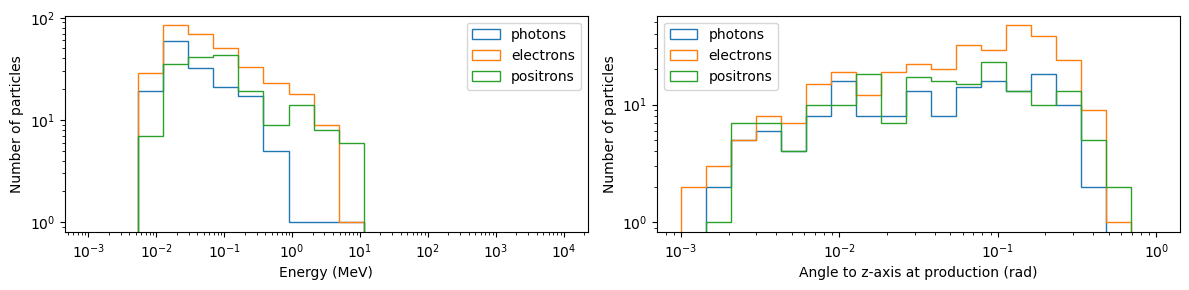

In [8]:
# Let's look at different particles in the shower and their properties.
print('Total number of particles: ', len(fast_shower))
photons = [p for p in fast_shower if p.get_pid() == 22]
electrons = [p for p in fast_shower if p.get_pid() == 11]
positrons = [p for p in fast_shower if p.get_pid() == -11]
print('Number of (photons, electrons, positrons): ', len(photons), len(electrons), len(positrons))
# Let's look at the energy and angle spectra of all particles.
# Let's make these plots in log-log scale, all particles go in the same plot, energy goes in the left panel, while angle goes in the right panel.
bins_energy = np.logspace(-3, 4, 20)
bins_angle = np.logspace(-3, 0, 20) # radians
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.hist([p.get_p0()[0] for p in photons], bins=bins_energy, histtype='step', label='photons')
plt.hist([p.get_p0()[0] for p in electrons], bins=bins_energy, histtype='step', label='electrons')
plt.hist([p.get_p0()[0] for p in positrons], bins=bins_energy, histtype='step', label='positrons')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of particles')
plt.legend()
plt.subplot(122)
plt.hist([p.get_angle_to_z_0() for p in photons], bins=bins_angle, histtype='step', label='photons')
plt.hist([p.get_angle_to_z_0() for p in electrons], bins=bins_angle, histtype='step', label='electrons')
plt.hist([p.get_angle_to_z_0() for p in positrons], bins=bins_angle, histtype='step', label='positrons')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Angle to z-axis at production (rad)')
plt.ylabel('Number of particles')
plt.legend()
plt.tight_layout()
plt.show()

Total number of particles:  704
Number of (photons, electrons, positrons):  161 383 160


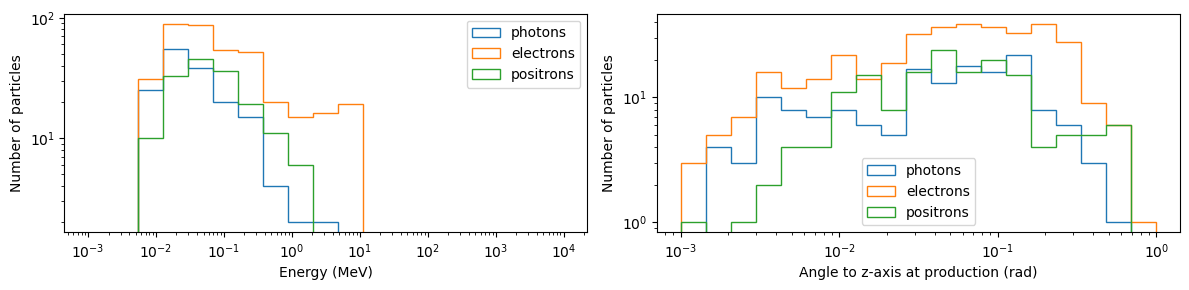

In [9]:
# Let's look at different particles in the shower and their properties.
print('Total number of particles: ', len(slow_shower))
photons = [p for p in slow_shower if p.get_pid() == 22]
electrons = [p for p in slow_shower if p.get_pid() == 11]
positrons = [p for p in slow_shower if p.get_pid() == -11]
print('Number of (photons, electrons, positrons): ', len(photons), len(electrons), len(positrons))
# Let's look at the energy and angle spectra of all particles.
# Let's make these plots in log-log scale, all particles go in the same plot, energy goes in the left panel, while angle goes in the right panel.
bins_energy = np.logspace(-3, 4, 20)
bins_angle = np.logspace(-3, 0, 20) # radians
plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.hist([p.get_p0()[0] for p in photons], bins=bins_energy, histtype='step', label='photons')
plt.hist([p.get_p0()[0] for p in electrons], bins=bins_energy, histtype='step', label='electrons')
plt.hist([p.get_p0()[0] for p in positrons], bins=bins_energy, histtype='step', label='positrons')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of particles')
plt.legend()
plt.subplot(122)
plt.hist([p.get_angle_to_z_0() for p in photons], bins=bins_angle, histtype='step', label='photons')
plt.hist([p.get_angle_to_z_0() for p in electrons], bins=bins_angle, histtype='step', label='electrons')
plt.hist([p.get_angle_to_z_0() for p in positrons], bins=bins_angle, histtype='step', label='positrons')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Angle to z-axis at production (rad)')
plt.ylabel('Number of particles')
plt.legend()
plt.tight_layout()
plt.show()

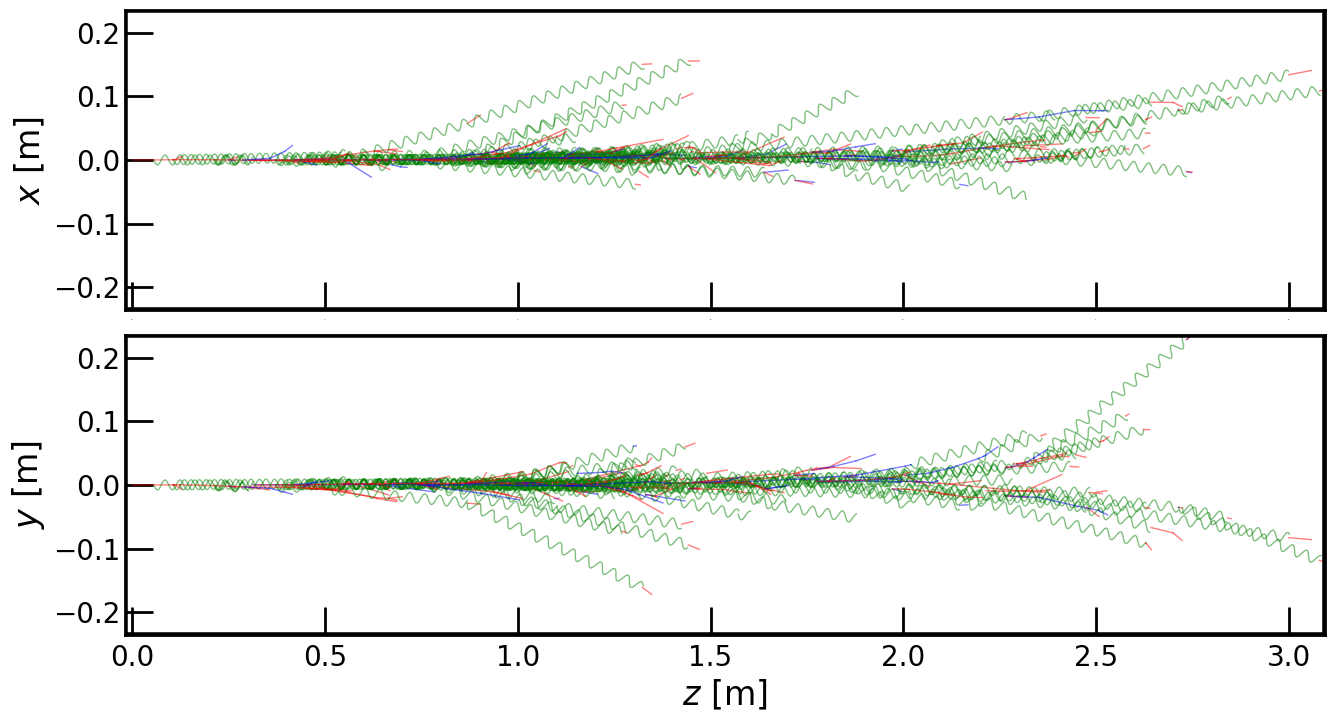

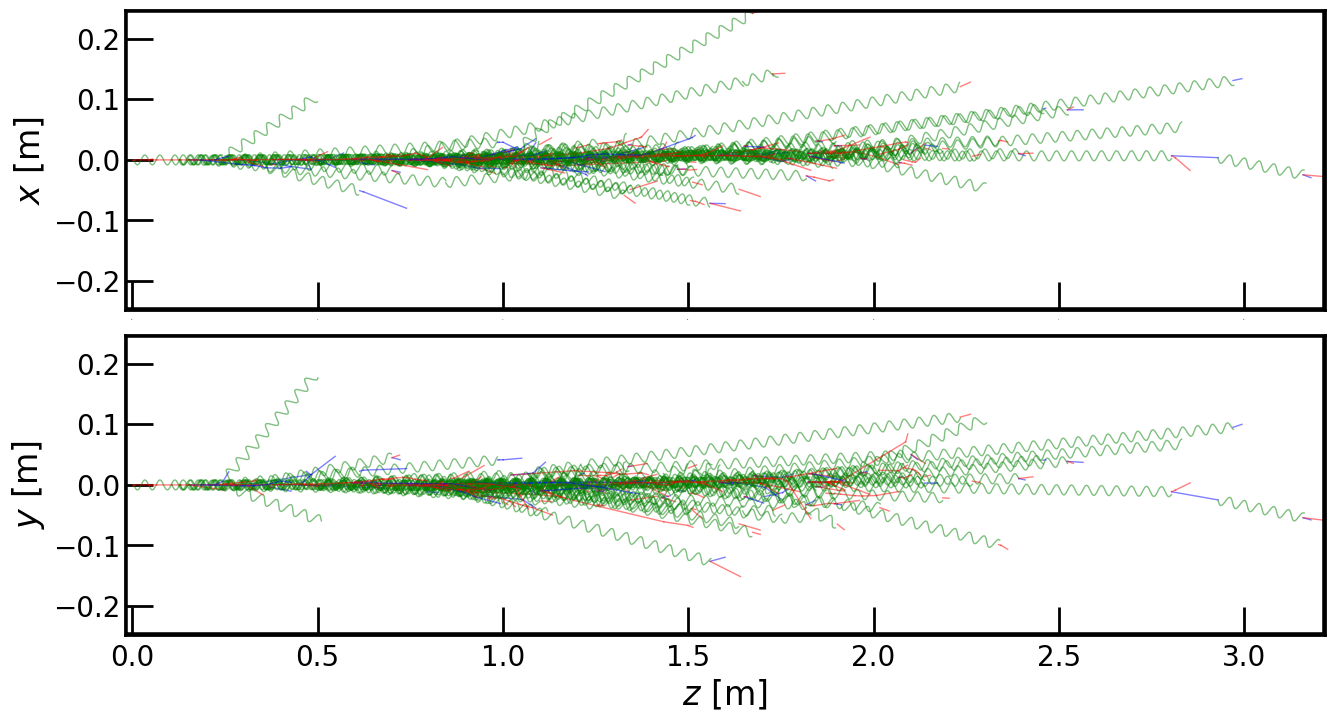

In [10]:
# We can also see the shower display for both graphite and lead
event_display(fast_shower)
event_display(slow_shower)

# Now lets look at dark showers

In [11]:
sGraphite_Bethe = DarkShower(PETITE_home_dir+dictionary_dir, "graphite", 0.030, 0.0323,fast_MCS_mode=False)
sGraphite_fast = DarkShower(PETITE_home_dir+dictionary_dir, "graphite", 0.030, 0.0323,fast_MCS_mode=True)

In [ ]:
n_trials=1000

momenta_fast, weights_fast = {}, {}
parent_pid_options = [11, -11, 22]
for pr in dark_process_codes:
    momenta_fast[pr] = {}
    weights_fast[pr] = {}
    for pid in parent_pid_options:
        momenta_fast[pr][pid] = []
        weights_fast[pr][pid] = []

for kk in tqdm(range(n_trials)):
    p0 = [10, 0, 0, 10]
    r0 = [0, 0, 0]
    pdict = {"PID":22}
    part0_fast = Particle(p0, r0, pdict)
    s0SM_fast = sGraphite_fast.generate_shower(part0_fast)
    fast_dark_shower=sGraphite_fast.generate_dark_shower(ExDir=list(s0SM_fast)) 
    for p0 in fast_dark_shower[1]:   
        genprocess = p0.get_ids()["generation_process"]
        parent_pid = p0.get_ids()["parent_PID"]

        momenta_fast[genprocess][parent_pid].append(p0.get_p0())
        weights_fast[genprocess][parent_pid].append(p0.get_ids()["weight"])

tantheta_fast=[]
for p in momenta_fast['DarkAnn'][-11]:
    tantheta_fast.append(np.sqrt(p[1]**2+p[2]**2)/p[3])


momenta_Bethe, weights_Bethe = {}, {}
parent_pid_options = [11, -11, 22]
for pr in dark_process_codes:
    momenta_Bethe[pr] = {}
    weights_Bethe[pr] = {}
    for pid in parent_pid_options:
        momenta_Bethe[pr][pid] = []
        weights_Bethe[pr][pid] = []

for kk in tqdm(range(n_trials)):
    p0 = [10, 0, 0, 10]
    r0 = [0, 0, 0]
    pdict = {"PID":22}
    part0_Bethe = Particle(p0, r0, pdict)
    s0SM_Bethe = sGraphite_Bethe.generate_shower(part0_Bethe)
    Bethe_dark_shower=sGraphite_Bethe.generate_dark_shower(ExDir=list(s0SM_Bethe)) 
    for p0 in Bethe_dark_shower[1]:   
        genprocess = p0.get_ids()["generation_process"]
        parent_pid = p0.get_ids()["parent_PID"]

        momenta_Bethe[genprocess][parent_pid].append(p0.get_p0())
        weights_Bethe[genprocess][parent_pid].append(p0.get_ids()["weight"])

tantheta_Bethe=[]
for p in momenta_Bethe['DarkAnn'][-11]:
    tantheta_Bethe.append(np.sqrt(p[1]**2+p[2]**2)/p[3])

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print("Number of Fast samples:"  , len(tantheta_fast))
print("Number of Bethe samples:" ,len(tantheta_Bethe))

In [ ]:
b0 = np.logspace(-4, -1, 16)
dens = False
plt.hist(tantheta_fast, weights=weights_fast['DarkAnn'][-11],  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)
plt.hist(tantheta_Bethe, weights=weights_Bethe['DarkAnn'][-11],  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',)

limit_range=950
vline_x=(2.5/574.0)*np.ones(101)
vline_y=np.linspace(0,limit_range,101)
plt.plot(vline_x,vline_y)
plt.ylim(0,limit_range)
#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"Number of counts", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.show()


plt.hist(tantheta_fast,   bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)
plt.hist(tantheta_Bethe,   bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',)

limit_range=4500
vline_x=(2.5/574.0)*np.ones(101)
vline_y=np.linspace(0,limit_range,101)
plt.plot(vline_x,vline_y)
plt.ylim(0,limit_range)
#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"Number of counts", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.show()

In [ ]:
b0 = np.logspace(-4, -np.log(574/2.5)/np.log(10), 16)
dens = False
plt.hist(tantheta_fast, weights=weights_fast['DarkAnn'][-11],  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)
plt.hist(tantheta_Bethe, weights=weights_Bethe['DarkAnn'][-11],  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',)

#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"Number of counts", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.show()


plt.hist(tantheta_fast,   bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)
plt.hist(tantheta_Bethe,   bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',)

#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"Number of counts", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.show()

# Lets do a light mass (5 MeV)

In [ ]:
sGraphite_Bethe = DarkShower(PETITE_home_dir+dictionary_dir, "graphite", 0.045, 0.05,fast_MCS_mode=False)
sGraphite_fast = DarkShower(PETITE_home_dir+dictionary_dir, "graphite", 0.045, 0.05,fast_MCS_mode=True)

In [ ]:
n_trials=3000

momenta_fast, weights_fast = {}, {}
parent_pid_options = [11, -11, 22]
for pr in dark_process_codes:
    momenta_fast[pr] = {}
    weights_fast[pr] = {}
    for pid in parent_pid_options:
        momenta_fast[pr][pid] = []
        weights_fast[pr][pid] = []

for kk in tqdm(range(n_trials)):
    p0 = [10, 0, 0, 10]
    r0 = [0, 0, 0]
    pdict = {"PID":22}
    part0_fast = Particle(p0, r0, pdict)
    s0SM_fast = sGraphite_fast.generate_shower(part0_fast)
    fast_dark_shower=sGraphite_fast.generate_dark_shower(ExDir=list(s0SM_fast)) 
    for p0 in fast_dark_shower[1]:   
        genprocess = p0.get_ids()["generation_process"]
        parent_pid = p0.get_ids()["parent_PID"]

        momenta_fast[genprocess][parent_pid].append(p0.get_p0())
        weights_fast[genprocess][parent_pid].append(p0.get_ids()["weight"])

tantheta_fast=[]
for p in momenta_fast['DarkAnn'][-11]:
    tantheta_fast.append(np.sqrt(p[1]**2+p[2]**2)/p[3])



In [ ]:
n_trials=3000

momenta_Bethe, weights_Bethe = {}, {}
parent_pid_options = [11, -11, 22]
for pr in dark_process_codes:
    momenta_Bethe[pr] = {}
    weights_Bethe[pr] = {}
    for pid in parent_pid_options:
        momenta_Bethe[pr][pid] = []
        weights_Bethe[pr][pid] = []

for kk in tqdm(range(n_trials)):
    p0 = [10, 0, 0, 10]
    r0 = [0, 0, 0]
    pdict = {"PID":22}
    part0_Bethe = Particle(p0, r0, pdict)
    s0SM_Bethe = sGraphite_Bethe.generate_shower(part0_Bethe)
    Bethe_dark_shower=sGraphite_Bethe.generate_dark_shower(ExDir=list(s0SM_Bethe)) 
    for p0 in Bethe_dark_shower[1]:   
        genprocess = p0.get_ids()["generation_process"]
        parent_pid = p0.get_ids()["parent_PID"]

        momenta_Bethe[genprocess][parent_pid].append(p0.get_p0())
        weights_Bethe[genprocess][parent_pid].append(p0.get_ids()["weight"])

tantheta_Bethe=[]
for p in momenta_Bethe['DarkAnn'][-11]:
    tantheta_Bethe.append(np.sqrt(p[1]**2+p[2]**2)/p[3])

In [ ]:
b0 = np.logspace(-4, -1, 16)
dens = False
plt.hist(tantheta_fast, weights=weights_fast['DarkAnn'][-11],  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)
plt.hist(tantheta_Bethe, weights=weights_Bethe['DarkAnn'][-11],  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',)

limit_range=2700
vline_x=(2.5/574.0)*np.ones(101)
vline_y=np.linspace(0,limit_range,101)
plt.plot(vline_x,vline_y)
plt.ylim(0,limit_range)
#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"Number of counts", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.show()


plt.hist(tantheta_fast,   bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)
plt.hist(tantheta_Bethe,   bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',)

limit_range=12000
vline_x=(2.5/574.0)*np.ones(101)
vline_y=np.linspace(0,limit_range,101)
plt.plot(vline_x,vline_y)
plt.ylim(0,limit_range)
#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"Number of counts", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.show()

In [ ]:
b0 = np.logspace(-4, -np.log(574/2.5)/np.log(10), 11)
dens = False
plt.hist(tantheta_fast, weights=weights_fast['DarkAnn'][-11],  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)
plt.hist(tantheta_Bethe, weights=weights_Bethe['DarkAnn'][-11],  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',)

#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"Number of counts", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.show()


plt.hist(tantheta_fast,   bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)
plt.hist(tantheta_Bethe,   bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',)

#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"Number of counts", fontsize=24)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.show()

In [ ]:
arr_Bethe=np.asarray(tantheta_Bethe)
arr_fast=np.asarray(tantheta_fast)
print(len(arr_Bethe[arr_Bethe<=2.5/574])/len(arr_Bethe)) 
print(len(arr_fast[arr_fast<=2.5/574])/len(arr_fast)) 

In [ ]:
tantheta_fast_pos=[]
for p in momenta_fast['DarkBrem'][-11]:
    tantheta_fast_pos.append(np.sqrt(p[1]**2+p[2]**2)/p[3])

tantheta_fast_elec=[]
for p in momenta_fast['DarkBrem'][11]:
    tantheta_fast_elec.append(np.sqrt(p[1]**2+p[2]**2)/p[3])

tantheta_Bethe_pos=[]
for p in momenta_Bethe['DarkBrem'][-11]:
    tantheta_Bethe_pos.append(np.sqrt(p[1]**2+p[2]**2)/p[3])

tantheta_Bethe_elec=[]
for p in momenta_Bethe['DarkBrem'][11]:
    tantheta_Bethe_elec.append(np.sqrt(p[1]**2+p[2]**2)/p[3])

In [ ]:
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import FixedLocator, MaxNLocator
import itertools


font0 = FontProperties()
font = font0.copy()
font.set_size(24)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')
legfont=font0.copy()
legfont.set_size(18)
legfont.set_weight('bold')

"""Make Plots Pretty!"""
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

b0 = np.logspace(-4, 1, 31)
dens = False
l1, = plt.hist(tantheta_fast_elec, weights=weights_fast['DarkBrem'][11],  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-')[2]
l2, = plt.hist(tantheta_Bethe_elec, weights=weights_Bethe['DarkBrem'][11],  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',label=r"$e^-$ Brems.")[2]

plt.hist(tantheta_fast_pos, weights=weights_fast['DarkBrem'][-11],  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='--')
plt.hist(tantheta_Bethe_pos, weights=weights_Bethe['DarkBrem'][-11],  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='--',label=r"$e^+$ Brems.")

plt.hist(tantheta_fast, weights=3.33333E-4*np.asarray(weights_fast['DarkAnn'][-11]),  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls=':')
plt.hist(tantheta_Bethe, weights=3.3333E-4*np.asarray(weights_Bethe['DarkAnn'][-11]),  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls=':',label=r"$e^+$ Ann.")


plt.axvline(2.5/574, lw=3)
legend1 = plt.legend([l1,l2], ["Lynch-Dahl", "Bethe-Moliere"],  prop=legfont, framealpha=1.0,loc='upper left',title=r"MCS Method", title_fontsize=20)
plt.gca().add_artist(legend1)
plt.legend(loc='upper right', prop=legfont, framealpha=1.0, title=r"$E_{\gamma} = 10~\mathrm{GeV}$", title_fontsize=20)



#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"$N_V/(10~{\rm GeV}~\gamma)/ {\rm bin} ~~~ (\epsilon=1)$", fontsize=24)
plt.text(2.5E-2,0.44,r"$\times 3\cdot 10^4$", fontsize=18)
#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.savefig("MCS_full.pdf", pad_inches=0.0)
plt.show()


b0 = np.logspace(-4, -np.log(574/2.5)/np.log(10), 11)
plt.hist(tantheta_fast_elec, weights=weights_fast['DarkBrem'][11],  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='-',)[2]
plt.hist(tantheta_Bethe_elec, weights=weights_Bethe['DarkBrem'][11],  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='-',label=r"$e^-$ Brems.")[2]

plt.hist(tantheta_fast_pos, weights=weights_fast['DarkBrem'][-11],  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls='--',)
plt.hist(tantheta_Bethe_pos, weights=weights_Bethe['DarkBrem'][-11],  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls='--',label=r"$e^+$ Brems.")

plt.hist(tantheta_fast, weights=3E-4*np.asarray(weights_fast['DarkAnn'][-11]),  bins=b0, histtype='step', lw=3, color='C6', density=dens, ls=':')
plt.hist(tantheta_Bethe, weights=3E-4*np.asarray(weights_Bethe['DarkAnn'][-11]),  bins=b0, histtype='step', lw=3, color='C2', density=dens, ls=':',label=r"$e^+$ Ann.")

legend1 = plt.legend([l1,l2], ["Lynch-Dahl", "Bethe-Moliere"],  prop=legfont, framealpha=1.0,loc='lower left',title=r"MCS Method", title_fontsize=20)
plt.gca().add_artist(legend1)
plt.legend(loc='best', prop=legfont, framealpha=1.0, title=r"$E_{\gamma} = 10~\mathrm{GeV}$", title_fontsize=20)



#plt.gca().legend(loc='best', fontsize=16, framealpha=1.0)
plt.gca().set_xscale('log')
#plt.gca().set_yscale('log')
plt.gca().set_xlabel(r"$p_T / p_z$", fontsize=24)
plt.gca().set_ylabel(r"$N_V/(10~{\rm GeV}~\gamma)/ {\rm bin} ~~~ (\epsilon=1)$", fontsize=24)
plt.text(2.5E-3,0.2,r"$\times 3\cdot 10^4$", fontsize=18)

#plt.gca().axis([1e-3,100,1e-11,1e-3])
[l.set_size(16) for l in plt.gca().get_xticklabels()]
[l.set_size(16) for l in plt.gca().get_yticklabels()]

set_size(8.0, 5.0)
plt.savefig("MCS_cut.pdf", pad_inches=0.0)
plt.show()